In [1]:
from model import Gadget
from simulation import Simulation
from matplotlib import pyplot as plt
import numpy as np

In [2]:
gadget = Gadget(material='U235',
           initial_radius_cm=8.4,
           initial_neutron_conc=0,
           initial_neutron_burst_conc_perm3=50000,
           time_step_s=1E-10, 
           num_points_radial=100,
           neutron_multiplication_on=True
          )
gadget_list = []
gadget_list.append(gadget)

Set up with U235


In [3]:
sim = Simulation(gadget_list=gadget_list,
                 sim_duration_us=3,
                 dt_us=0.0001)

Number of sim steps: 30000


In [4]:
sim.run_gadgets()
g = sim.gadget_list[0]

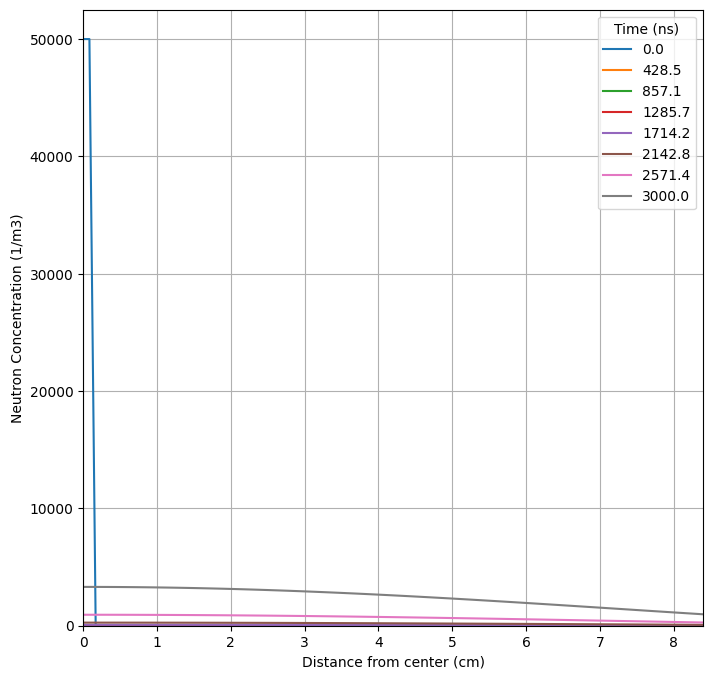

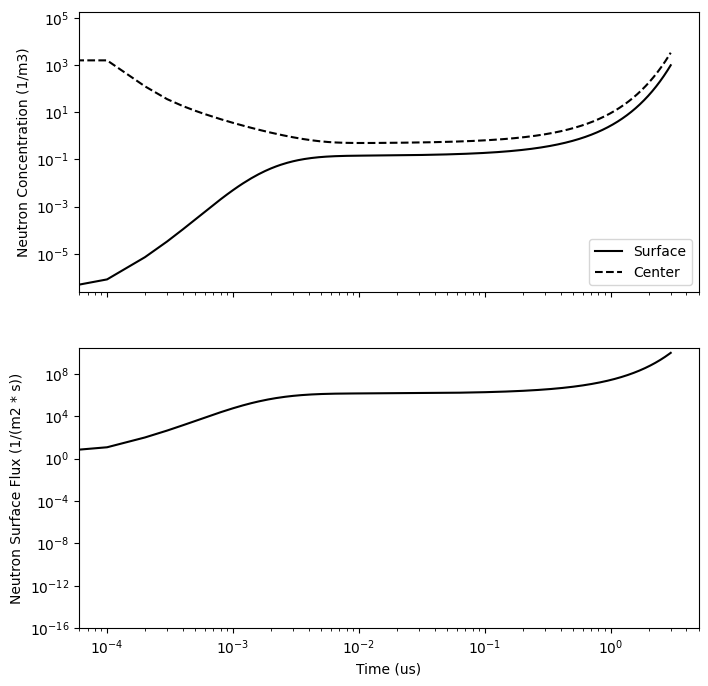

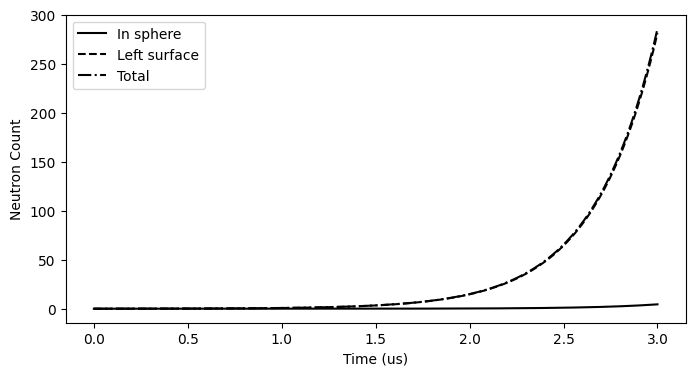

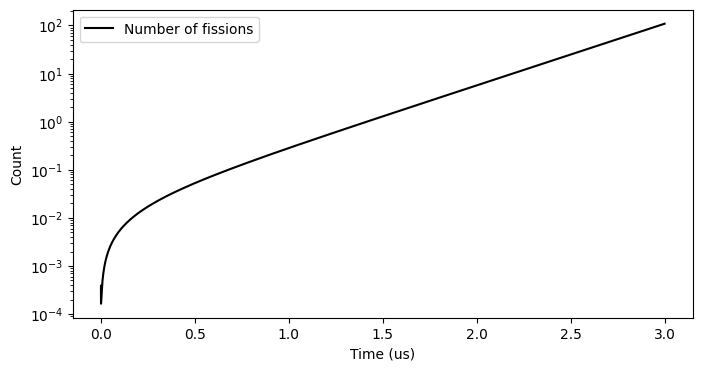

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
snapshots = 8

steps_to_plot = np.linspace(0, g.neutron_conc_matrix.shape[0] - 1, 
                            snapshots, dtype=int)
for s in steps_to_plot:
    ax.plot(g.radius_points, g.neutron_conc_matrix[int(s), :], 
            label = round(s * g.time_step_s * 1E9, ndigits=3),
            marker='')

# ax.set_ylim(1E-12)    
# ax.set_yscale('log')
ax.set_ylim(0)

ax.legend(title='Time (ns)')
ax.set_ylabel('Neutron Concentration (1/m3)')
ax.set_xlabel('Distance from center (cm)')
ax.grid(visible=True, which='major')
ax.set_xlim(0, g.initial_radius_cm)
ax.ticklabel_format(useOffset=False)

fig, ax = plt.subplots(2, 1, sharex=True, figsize = (8,8))

ax[0].plot(g.sim_time_array_us, g.neutron_conc_matrix[:, -1], color = 'black',
           label = 'Surface')
ax[0].plot(g.sim_time_array_us, g.neutron_conc_matrix[:, 0], color = 'black',
           linestyle = '--',
           label = 'Center')

ax[1].plot(g.sim_time_array_us, g.surface_flux, color = 'black')

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(1E-16)

ax[1].set_xscale('log')

ax[1].set_xlabel('Time (us)')
ax[0].set_ylabel('Neutron Concentration (1/m3)')
ax[1].set_ylabel('Neutron Surface Flux (1/(m2 * s))')

ax[0].legend()


fig, ax = plt.subplots(1, 1, sharex=True, figsize = (8, 4))

ax.plot(g.sim_time_array_us, g.neutrons_in_sphere, color = 'black',
        label = 'In sphere')

ax.plot(g.sim_time_array_us, g.cumulative_neutrons_left, color = 'black',
        linestyle = '--',
        label = 'Left surface')

ax.plot(g.sim_time_array_us, g.total_neutrons, color = 'black',
        linestyle = '-.',
        label = 'Total')

#ax.set_yscale('log')
#ax.set_xscale('log')

ax.set_xlabel('Time (us)')
ax.set_ylabel('Neutron Count')
ax.legend()

fig, ax = plt.subplots(1, 1, sharex=True, figsize = (8, 4))
ax.plot(g.sim_time_array_us, g.num_fissions, color = 'black',
        label = 'Number of fissions')

ax.set_yscale('log')

ax.set_xlabel('Time (us)')
ax.set_ylabel('Count')
ax.legend()


